# Cap Recognizer
The goal of this project is to classify 20 different types of caps / headwears commonly worn around the world. The types are following: <br/>
1. baseball cap
2. beanie cap
3. fedora cap
4. cowboy hat
5. kepi cap
6. flat cap
7. trucker cap
8. newsboy cap
9. pork pie hat
10. bowler hat
11. top hat
12. sun hat
13. boater hat
14. ivy cap
15. bucket hat
16. balaclava cap
17. turban cap
18. taqiyah cap
19. rasta cap
20. visor cap

##Setting up the necessary things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8
version = 0

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [3]:
from fastai import *
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/MasterCourseML/week-8/cap recogniser

/content/drive/My Drive/MasterCourseML/week-8/cap recogniser


In [ ]:
ls

'baseball cap.jpg'       data/            models/        test_images/
 cap_dataloader_v0.pkl  'data loaders'/  'Note books'/


In [ ]:
# not necessary. to zip the data that i have collected and save it to drive
# !zip -r '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/cap_data.zip' '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/data'

##Download Images from Browser


You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API.

For ease, we are going to use DuckDuckGo Image Search.

Good news! Fastai has a function to do this for us.

To use DuckDuckGo to download images, use the search_images_ddg function from

---

fastbook:

In [ ]:
urls = search_images_ddg('grizzly bear', max_images=100)     # we can replace the name grizzly bear by any search term
len(urls)

100

In [ ]:
urls[0]

'http://i.huffpost.com/gen/1199908/images/o-GRIZZLY-BEAR-facebook.jpg'

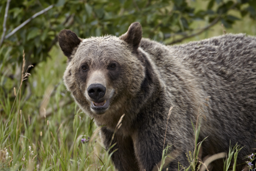

In [ ]:
download_url(urls[0], 'image/bear.jpg')
im = Image.open('image/bear.jpg')
im.thumbnail((256,256))
im

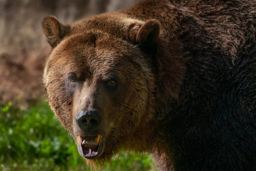

In [ ]:
download_url(urls[90], 'image/bear.png')
im = Image.open('image/bear.png')
im.thumbnail((256,256))
im

In [ ]:
doc(search_images_ddg)       #just for checking purpose we use doc

In [6]:
cap_labels = [
    "baseball cap",
    "beanie cap",
    "fedora cap",
    "cowboy hat",
    "kepi cap",
    "flat cap",
    "trucker cap",
    "newsboy cap",
    "pork pie hat",
    "bowler hat",
    "top hat",
    "sun hat",
    "boater hat",
    "ivy cap",
    "bucket hat",
    "balaclava cap",
    "turban cap",
    "taqiyah cap",
    "rasta cap",
    "visor cap"
]
len(cap_labels)

20

In [ ]:
images = search_images_ddg(cap_labels[0])                 # the term is basketball cap and the size is 200 by default
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.joylot.com/afullsize_thumbs/ss/283_531483118.jpg'

In [ ]:
dest = "baseball cap.jpg"
download_url(images[0], dest, show_progress=False)

Path('baseball cap.jpg')

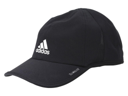

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [7]:
#combine all of them for collecting images

data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for cap_type in cap_labels:

  dest = f"{data_path}/{cap_type}"              #in data_path folder create folders for each cap_type and the images for each cap_type will store there
  if not os.path.exists(dest):
    os.mkdir(dest)

  if len(os.listdir(dest)) == 0:

    try:
      cap_image_urls = search_images_ddg(cap_type)
      download_images(dest, urls = cap_image_urls)

    except:
      continue
  else:
        print(f"Images for {cap_type} already exist. Skipping download.")

Images for baseball cap already exist. Skipping download.
Images for beanie cap already exist. Skipping download.
Images for fedora cap already exist. Skipping download.
Images for cowboy hat already exist. Skipping download.
Images for kepi cap already exist. Skipping download.
Images for flat cap already exist. Skipping download.
Images for trucker cap already exist. Skipping download.
Images for newsboy cap already exist. Skipping download.
Images for pork pie hat already exist. Skipping download.
Images for bowler hat already exist. Skipping download.
Images for top hat already exist. Skipping download.
Images for sun hat already exist. Skipping download.
Images for boater hat already exist. Skipping download.
Images for ivy cap already exist. Skipping download.
Images for bucket hat already exist. Skipping download.
Images for balaclava cap already exist. Skipping download.
Images for turban cap already exist. Skipping download.
Images for taqiyah cap already exist. Skipping downl

In [8]:
image_counts = get_image_files(data_path)
image_counts

(#3230) [Path('data/baseball cap/5a3be1cf-0f18-4b3d-a17c-f44297e86299.jpeg'),Path('data/baseball cap/8d19fca9-bf8e-4afd-9e36-a59e2e38d02e.png'),Path('data/baseball cap/48efbc5a-a875-4039-bc40-7d32968aa6bc.jpg'),Path('data/baseball cap/a75c475b-85aa-466b-908b-eeb854004281.png'),Path('data/baseball cap/e375baf6-ba62-4611-a1dc-21dde7f0a6e8.jpeg'),Path('data/baseball cap/dd1538b5-04f1-4a03-98ad-86a83c6e38ea.jpeg'),Path('data/baseball cap/8dfb4e20-b5c1-40f8-9f58-efd70942c2b2.jpeg'),Path('data/baseball cap/60c13b09-92b4-48b2-86cf-bea14879a6c1.jpeg'),Path('data/baseball cap/847b7190-4746-49e2-90d3-d927ca9e0e33.jpg'),Path('data/baseball cap/cec79f35-dbae-4470-b5bb-c1650e232b57.jpeg'),Path('data/baseball cap/9eb1b435-a78f-42c5-aa8c-b5825692115f.jpg'),Path('data/baseball cap/d5f9539a-4b1d-4f53-999d-caa4ce468b5b.jpg'),Path('data/baseball cap/e920dbc2-6687-4fd9-a246-ade26a4dd6fa.jpg'),Path('data/baseball cap/72253896-b4b7-4397-abad-80ada5d3dfd0.jpg'),Path('data/baseball cap/8053cf5f-1964-4493-9b2a

In [9]:
failed = verify_images(image_counts)       #check how many fail images there
failed

KeyboardInterrupt: 

In [ ]:
failed.map(Path.unlink)                    #remove all the fail images

##Fetch data

In [10]:
#creating datablock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))



In [ ]:
doc(DataBlock)

,Type,Default,Details,
blocks,list,None,One or more `TransformBlock`s,
dl_type,TfmdDL,None,"Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL`",
getters,list,None,Getter functions applied to results of `get_items`,
n_inp,int,None,Number of inputs,
item_tfms,list,None,"`ItemTransform`s, applied on an item",
batch_tfms,list,None,"`Transform`s or `RandTransform`s, applied by batch",
get_items,NoneType,None,,
splitter,NoneType,None,,
get_y,NoneType,None,,
get_x,NoneType,None,,


In [11]:
#data augmentations. (we can do data augmentation in three more ways as well)
dblock = dblock.new(item_tfms = RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

# dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size. 'new' is used for data augmentation
# dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
# dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size

#dataloaders
dls = dblock.dataloaders(data_path, bs=bs)


In [13]:
#check what are the serial of the labels that model done
dls.train.vocab

['balaclava cap', 'baseball cap', 'beanie cap', 'boater hat', 'bowler hat', 'bucket hat', 'cowboy hat', 'fedora cap', 'flat cap', 'ivy cap', 'kepi cap', 'newsboy cap', 'pork pie hat', 'rasta cap', 'sun hat', 'taqiyah cap', 'top hat', 'trucker cap', 'turban cap', 'visor cap']

In [ ]:
#save file for further use.
torch.save(dls, f"data loaders/cap_dataloader_v{version}.pkl")

In [ ]:
ls

'baseball cap.jpg'       data/            image/   'Note books'/
 cap_dataloader_v0.pkl  'data loaders'/   models/   test_images/


In [ ]:
#load the pkl file for further use
# dls = torch.load(f"data loaders/cap_dataloader_v{version}.pkl")

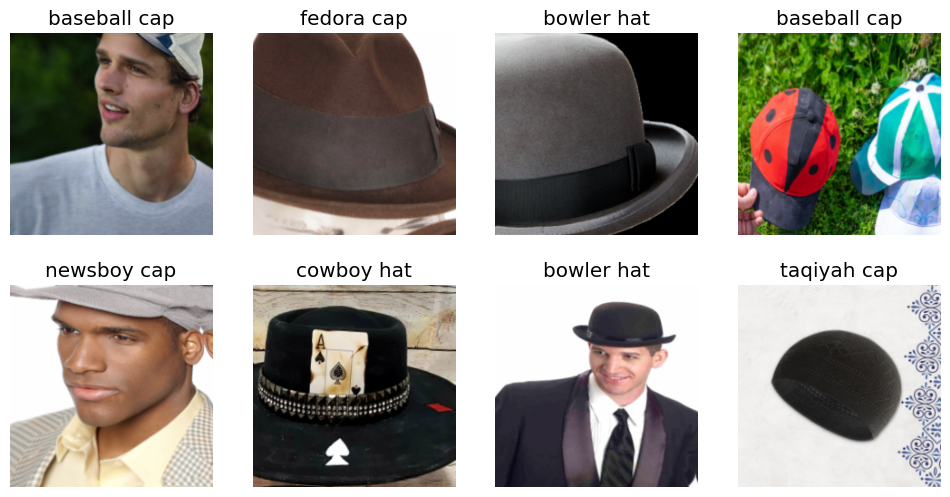

In [ ]:
#show some data from train dataset
dls.train.show_batch(max_n=8, nrows=2)

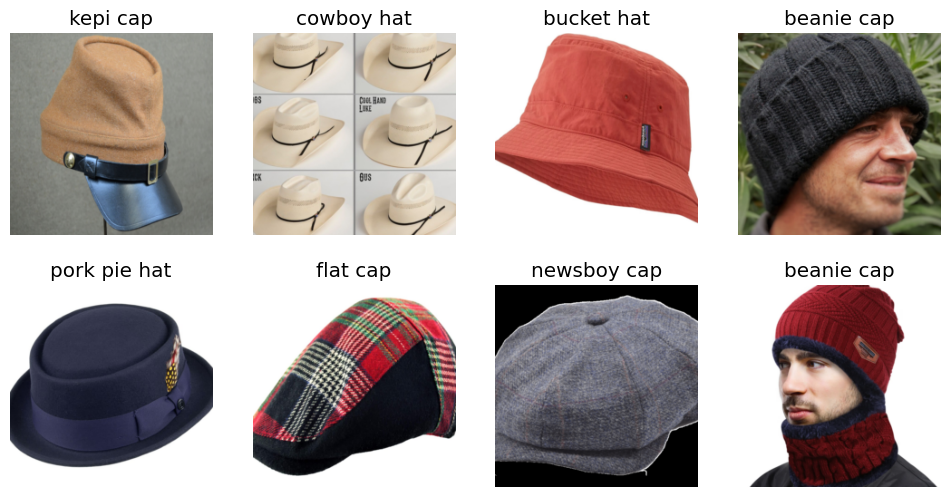

In [ ]:
#show some data from validation dataset
dls.valid.show_batch(max_n=8, nrows=2)

##Training and Data cleaning

In [ ]:
#path where model will save after training
model_path = 'models'

In [ ]:
#load model for further used or for inference
# model.load(f"{model_path}/cap_recognizer_v{version-1}")

In [ ]:
#load model or metrics before training
model = vision_learner(dls, resnet34, metrics = [error_rate, accuracy])    #we can replace resnet34 by any model from timm or that are accessible by fastai

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 171MB/s]


In [ ]:
#fine tune the pre-trained model (training)
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.264189,1.504806,0.430341,0.569659,02:29


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.679511,1.185904,0.346749,0.653251,02:33
1,1.586183,1.124405,0.309598,0.690402,02:35
2,1.295474,0.960952,0.281734,0.718266,02:33
3,0.872671,0.724675,0.207430,0.792570,02:38
4,0.785609,0.693006,0.188854,0.811145,02:36


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

In [ ]:
#save model (when pc tured off or something happen we can do the rest of the training by load the saving model. it's also needs for inference)
model.save(f"cap_recognizer_v{version}")

Path('models/cap_recognizer_v0.pth')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


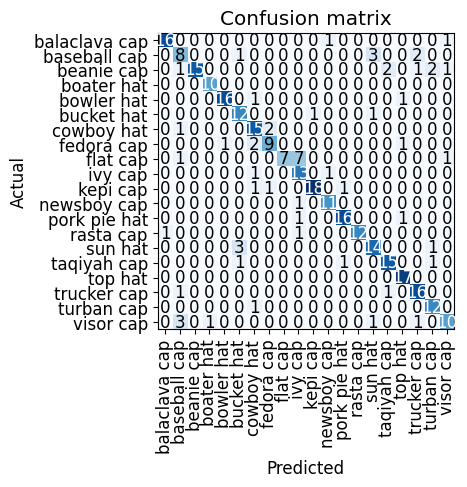

In [ ]:
#create confusion matrix
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

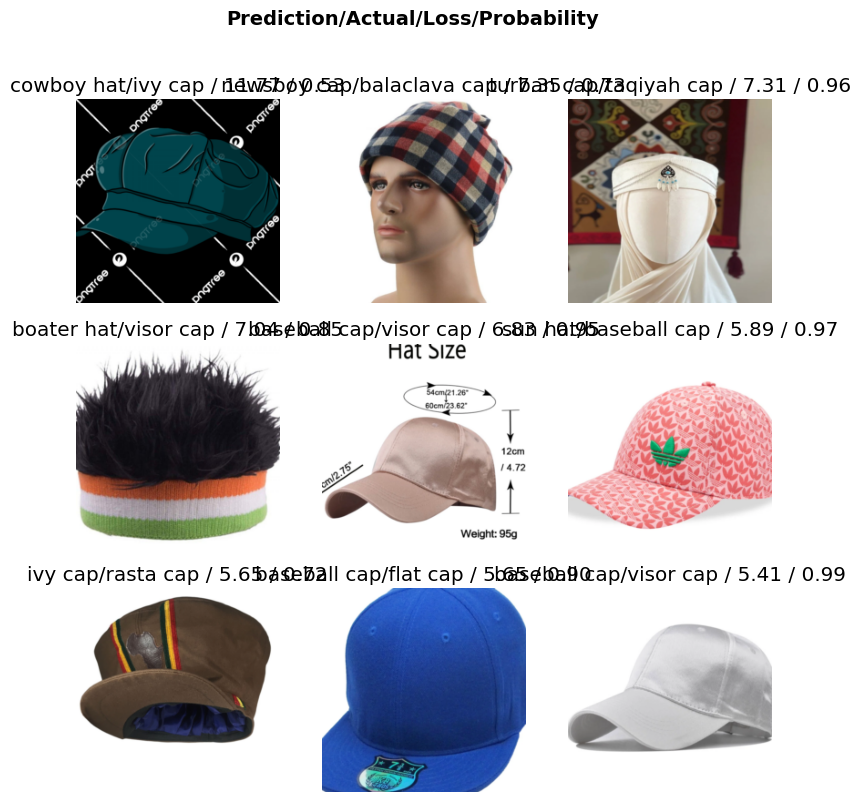

In [ ]:
#plot images for top losses
interp.plot_top_losses(9, nrows=3)

##cleaning
* replace/delete the images that are irrelevant
* for better accuracy clean the data, train the model and save the pkl file as different version name

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#delete after cleaning
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()            #delete irrelevant data

for idx, cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")      #change the directory

##Export model for inference

In [ ]:
model.export(f"{model_path}/cap_recognizer_v{version}.pkl")

##Setting up for inference

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
%cd /content/drive/My Drive/MasterCourseML/week-8/cap recogniser

/content/drive/My Drive/MasterCourseML/week-8/cap recogniser


In [ ]:
version = 0
image_path = 'test_images'
model_path = f"models/cap_recognizer_v{version}.pkl"

In [ ]:
model = load_learner(model_path)

###Inference 1
target: cowboy hat

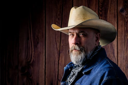

In [ ]:
img = Image.open(f"{image_path}/unknown_00.jpg")
img.to_thumb(128,128)

In [ ]:
model.predict(img)

('cowboy hat',
 tensor(6),
 tensor([1.3819e-07, 3.1327e-06, 1.8450e-08, 1.8672e-04, 7.7013e-04, 3.2001e-04, 9.6301e-01, 3.3374e-02, 1.4956e-05, 7.4705e-06, 1.6511e-07, 4.6293e-07, 1.3003e-03, 1.3507e-05, 7.4553e-04, 2.7827e-06,
         2.4942e-04, 1.2602e-06, 2.2956e-08, 2.5914e-07]))

###Inference 2
target: beanie cap

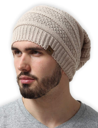

In [ ]:
img_b = Image.open(f"{image_path}/unknown_01.jpg")
img_b.to_thumb(128,128)

In [ ]:
model.predict(img_b)

('beanie cap',
 tensor(2),
 tensor([1.8911e-05, 7.3016e-06, 9.9928e-01, 1.7112e-07, 8.2830e-08, 2.5712e-06, 1.6195e-08, 2.9819e-08, 1.0773e-06, 1.1990e-06, 2.5716e-06, 1.9897e-06, 1.4182e-08, 5.6809e-05, 1.0502e-06, 1.2746e-04,
         1.6497e-08, 8.3320e-06, 4.3151e-04, 6.2059e-05]))

###Inference 3
target: taqiyah cap

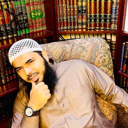

In [ ]:
img_t = Image.open(f"{image_path}/unknown_02.jpg")
img_t.to_thumb(128,128)

In [ ]:
model.predict(img_t)

('taqiyah cap',
 tensor(15),
 tensor([3.6717e-04, 8.9421e-03, 2.6340e-03, 3.5081e-03, 8.9669e-05, 1.2078e-04, 4.6959e-04, 3.1010e-05, 1.1939e-02, 1.6846e-03, 2.0782e-04, 7.2593e-03, 2.7948e-04, 2.4214e-04, 6.8568e-04, 6.8136e-01,
         3.5809e-05, 1.5644e-02, 2.6382e-01, 6.8178e-04]))

###Inference 4
target: boater hat

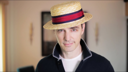

In [ ]:
img_bt = Image.open(f"{image_path}/unknown_03.jpg")
img_bt.to_thumb(128,128)

In [ ]:
model.predict(img_bt)

('boater hat',
 tensor(3),
 tensor([1.0976e-09, 1.2465e-09, 1.9860e-08, 1.0000e+00, 8.3837e-08, 4.0528e-08, 1.2349e-08, 3.2689e-07, 1.0068e-09, 4.2900e-09, 1.2845e-08, 3.2712e-08, 3.3270e-07, 3.6098e-07, 7.8116e-08, 3.3758e-07,
         2.9005e-07, 1.2847e-08, 9.1662e-08, 8.7675e-09]))

#Deploy the model to huggingface space

see the other colab